In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from persistence import *

In [2]:
# Define an example instance and its original class label
def generate_vectors_between(arr1, arr2, num_vectors=10):
    new_arr = []
    
    for _ in range(num_vectors):
        vector = []
        for i in range(len(arr1)):
            # Générer une valeur aléatoire entre les éléments correspondants des deux tableaux
            value_between = np.random.uniform(arr1[i], arr2[i])
            vector.append(value_between)
        new_arr.append(vector)
    
    return np.array(new_arr)

# bottom = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])
# top = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])
# set_ = generate_vectors_between(bottom,top,num_vectors=100)
# original_label = rf.predict(top.reshape(1, -1)).ravel()[0]
# predicted_label = dt.predict(top.reshape(1, -1)).ravel()[0]
# print(original_label,predicted_label)
# s=0
# for elt in set_ : 
#   s+=rf.predict(elt.reshape(1, -1)).ravel()[0]-dt.predict(elt.reshape(1, -1)).ravel()[0]
# print(s)



In [19]:
def extract_region(path) :
    Bottomvector = None
    Topvector = None
    with open(path, 'r') as file:
        for line in file:
            if line.startswith('Bottom Vector'):
                vector_str = line.split(':')[1].strip()  # Supprime le "Bottom Vector" et les espaces
                Bottomvector = [float(num) for num in vector_str.split(',')]
            if line.startswith('Top Vector'):
                vector_str = line.split(':')[1].strip()  # Supprime le "Bottom Vector" et les espaces
                Topvector = [float(num) for num in vector_str.split(',')]
                
    if Bottomvector is None :
        print(path,'\n')
    return Bottomvector, Topvector
def extract_time(path) :
    with open(path, 'r') as file:
        line = file.readline().strip()
    cases = line.split(",")
    return cases[10]
def extract_gain(path) :
    with open(path, 'r') as file:
        for line in file:
            if line.startswith('Gain'):
                gain = float(line.split(':')[-1].strip())
    return gain

In [20]:
datasets = ["Breast-Cancer-Wisconsin","COMPAS-ProPublica","FICO","HTRU2","Pima-Diabetes","Seeds"]
lossDict = dict()
timeDict = dict()
HtimeDict = dict()
gainDict = dict()
HgainDict = dict()
for dataset in ["FICO"] :
    timeDict[dataset] = [np.array([k for k in range(5,10)]),np.array([0.0 for k in range(5,10)])]
    HtimeDict[dataset] = [np.array([k for k in range(5,10)]),np.array([0.0 for k in range(5,10)])]
    gainDict[dataset] = [np.array([k for k in range(5,10)]),np.array([0.0 for k in range(5,10)])]
    HgainDict[dataset] = [np.array([k for k in range(5,10)]),np.array([0.0 for k in range(5,10)])]
    for i in range(1,11) :
        path = "/home/elkzak/BA-Trees/src/resources/datasets/" + dataset + "/" + dataset +".train"+str(i)+".csv"
        temp_data = np.genfromtxt(path, delimiter=",")
        temp_data = temp_data[1:]
        temp_X,temp_Y= temp_data[:, :-1], temp_data[:, -1]
        rf_path = '/home/elkzak/BA-Trees/src/resources/forests/'+ dataset + "/" + dataset + ".RF"+str(i)+".txt"
        temp_rf = classifier_from_file(rf_path,temp_X,temp_Y)
        loss = 0
        for j in range(5,10) :
            if(i==1) : 
                continue
            dt_path = '/home/elkzak/BA-Trees/src/outputDeter/'+ dataset + "/" + dataset +".BA"+str(i)+".D"+str(j)+'.tree'
            out_path = '/home/elkzak/BA-Trees/src/outputDeter/'+ dataset + "/" + dataset +".BA"+str(i)+".D"+str(j)+'.out'
            Hdt_path = '/home/elkzak/BA-Trees/src/outputHeuristic/'+ dataset + "/" + dataset +".BA"+str(i)+".D"+str(j)+'.tree'
            Hout_path = '/home/elkzak/BA-Trees/src/outputHeuristic/'+ dataset + "/" + dataset +".BA"+str(i)+".D"+str(j)+'.out'
            temp_dt= classifier_from_file(dt_path,temp_X,temp_Y)
            temp_Bottom,temp_Top = extract_region(dt_path)
            time = extract_time(out_path)
            Htime = extract_time(Hout_path)
            gain = extract_gain(dt_path)
            Hgain = extract_gain(Hdt_path)
            timeDict[dataset][1][j-5] += float(time) 
            HtimeDict[dataset][1][j-5] += float(Htime) 
            gainDict[dataset][1][j-5] += float(gain) 
            HgainDict[dataset][1][j-5] += float(Hgain)
            temp_region = generate_vectors_between(temp_Bottom,temp_Top,num_vectors=50)
            for elt in temp_region : 
                loss+=temp_rf.predict(elt.reshape(1, -1)).ravel()[0]-temp_dt.predict(elt.reshape(1, -1)).ravel()[0]
            loss /= 50
        loss/=8
        lossDict[dataset+str(i)] = loss
    timeDict[dataset][1] = (timeDict[dataset][1]/10.0).astype(float)
    HtimeDict[dataset][1] = (HtimeDict[dataset][1]/10.0).astype(float)
    gainDict[dataset][1] = (gainDict[dataset][1]/10.0).astype(float)
    HgainDict[dataset][1] = (HgainDict[dataset][1]/10.0).astype(float)
for elt in lossDict : 
    print(elt, " : ", lossDict[elt],'\n')

FICO1  :  0.0 

FICO2  :  0.0 

FICO3  :  0.0 

FICO4  :  0.0 

FICO5  :  0.0 

FICO6  :  0.0 

FICO7  :  0.0 

FICO8  :  0.0 

FICO9  :  0.0 

FICO10  :  0.0 



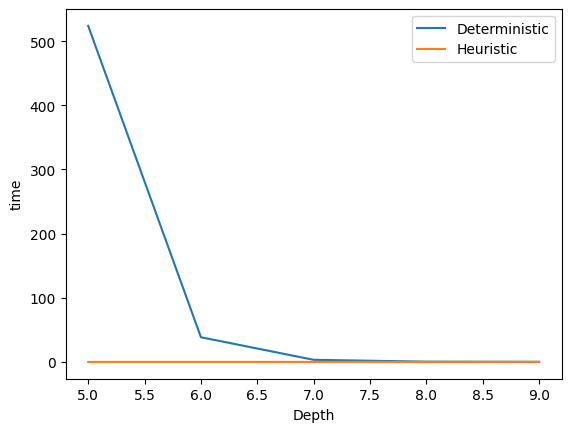

In [18]:
for dataset in ["FICO"]:
    plt.plot(timeDict[dataset][0],timeDict[dataset][1],label="Deterministic")
    plt.plot(HtimeDict[dataset][0],HtimeDict[dataset][1],label="Heuristic")
plt.legend()
plt.xlabel('Depth')
plt.ylabel('time')
plt.show()

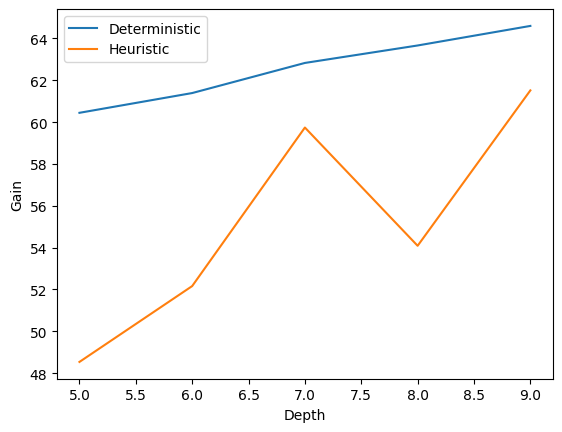

In [21]:
for dataset in ["FICO"]:
    plt.plot(gainDict[dataset][0],gainDict[dataset][1],label="Deterministic")
    plt.plot(HgainDict[dataset][0],HgainDict[dataset][1],label="Heuristic")
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Gain')
plt.show()